<a href="https://colab.research.google.com/github/20149312/Ha-Thanh-Hung-20149312/blob/main/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
%cd /content/drive/MyDrive/COLAB NOTEBOOK/FOOD

/content/drive/MyDrive/COLAB NOTEBOOK/FOOD


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/COLAB NOTEBOOK/FOOD/TRAIN',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 890 images belonging to 9 classes.


In [ ]:
training_set.class_indices

{'BANH CUON': 0,
 'BANH MII': 1,
 'BANH PIAA': 2,
 'BANH TET': 3,
 'BANH XEO': 4,
 'BUN DAU MAN TOM': 5,
 'CA KHO TO': 6,
 'COM TAM': 7,
 'PHO': 8}

In [ ]:

model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))

model.add(Dense(9,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(training_set,epochs= 200 ,batch_size=128,verbose=1, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/200
28/28 [==============================] - ETA: 0s - loss: 3.5499 - accuracy: 0.2596 

28/28 [==============================] - 433s 15s/step - loss: 3.5499 - accuracy: 0.2596
Epoch 2/200
28/28 [==============================] - ETA: 0s - loss: 1.6535 - accuracy: 0.4607

28/28 [==============================] - 19s 674ms/step - loss: 1.6535 - accuracy: 0.4607
Epoch 3/200
28/28 [==============================] - ETA: 0s - loss: 1.4911 - accuracy: 0.5067

28/28 [==============================] - 19s 661ms/step - loss: 1.4911 - accuracy: 0.5067
Epoch 4/200
28/28 [==============================] - ETA: 0s - loss: 1.2664 - accuracy: 0.5910

28/28 [==============================] - 19s 671ms/step - loss: 1.2664 - accuracy: 0.5910
Epoch 5/200
28/28 [==============================] - ETA: 0s - loss: 1.0900 - accuracy: 0.6281

28/28 [==============================] - 19s 643ms/step - loss: 1.0900 - accuracy: 0.6281
Epoch 6/200
28/28 [==============================] - ETA: 0s - loss: 0.9427 - accuracy: 0.6899

28/28 [==============================] - 19s 667ms/step - loss: 0.9427 - accuracy: 0.6899
Epoch 7/200
28/28 [==============================] - ETA: 0s - loss: 0.9241 - accuracy: 0.6989

28/28 [==============================] - 19s 671ms/step - loss: 0.9241 - accuracy: 0.6989
Epoch 8/200
28/28 [==============================] - ETA: 0s - loss: 0.8326 - accuracy: 0.7281

28/28 [==============================] - 20s 714ms/step - loss: 0.8326 - accuracy: 0.7281
Epoch 9/200
28/28 [==============================] - ETA: 0s - loss: 0.8682 - accuracy: 0.7056

28/28 [==============================] - 19s 661ms/step - loss: 0.8682 - accuracy: 0.7056
Epoch 10/200
28/28 [==============================] - ETA: 0s - loss: 0.7683 - accuracy: 0.7472

28/28 [==============================] - 19s 664ms/step - loss: 0.7683 - accuracy: 0.7472
Epoch 11/200
28/28 [==============================] - ETA: 0s - loss: 0.6683 - accuracy: 0.7854

28/28 [==============================] - 19s 660ms/step - loss: 0.6683 - accuracy: 0.7854
Epoch 12/200
28/28 [==============================] - ETA: 0s - loss: 0.5549 - accuracy: 0.8202

28/28 [==============================] - 19s 683ms/step - loss: 0.5549 - accuracy: 0.8202
Epoch 13/200
28/28 [==============================] - ETA: 0s - loss: 0.4970 - accuracy: 0.8315

28/28 [==============================] - 19s 665ms/step - loss: 0.4970 - accuracy: 0.8315
Epoch 14/200
28/28 [==============================] - ETA: 0s - loss: 0.5120 - accuracy: 0.8236

28/28 [==============================] - 19s 659ms/step - loss: 0.5120 - accuracy: 0.8236
Epoch 15/200
28/28 [==============================] - ETA: 0s - loss: 0.4691 - accuracy: 0.8303

28/28 [==============================] - 18s 660ms/step - loss: 0.4691 - accuracy: 0.8303
Epoch 16/200
28/28 [==============================] - ETA: 0s - loss: 0.4003 - accuracy: 0.8640

28/28 [==============================] - 18s 644ms/step - loss: 0.4003 - accuracy: 0.8640
Epoch 17/200
28/28 [==============================] - ETA: 0s - loss: 0.3505 - accuracy: 0.8719

28/28 [==============================] - 20s 704ms/step - loss: 0.3505 - accuracy: 0.8719
Epoch 18/200
28/28 [==============================] - ETA: 0s - loss: 0.4037 - accuracy: 0.8708

28/28 [==============================] - 18s 637ms/step - loss: 0.4037 - accuracy: 0.8708
Epoch 19/200
28/28 [==============================] - ETA: 0s - loss: 0.2933 - accuracy: 0.9067

28/28 [==============================] - 18s 654ms/step - loss: 0.2933 - accuracy: 0.9067
Epoch 20/200
28/28 [==============================] - ETA: 0s - loss: 0.2700 - accuracy: 0.9124

28/28 [==============================] - 18s 660ms/step - loss: 0.2700 - accuracy: 0.9124
Epoch 21/200
28/28 [==============================] - ETA: 0s - loss: 0.2608 - accuracy: 0.9101

28/28 [==============================] - 18s 650ms/step - loss: 0.2608 - accuracy: 0.9101
Epoch 22/200
28/28 [==============================] - ETA: 0s - loss: 0.2117 - accuracy: 0.9247

28/28 [==============================] - 18s 656ms/step - loss: 0.2117 - accuracy: 0.9247
Epoch 23/200
28/28 [==============================] - ETA: 0s - loss: 0.2272 - accuracy: 0.9258

28/28 [==============================] - 18s 651ms/step - loss: 0.2272 - accuracy: 0.9258
Epoch 24/200
28/28 [==============================] - ETA: 0s - loss: 0.3047 - accuracy: 0.9022

28/28 [==============================] - 18s 655ms/step - loss: 0.3047 - accuracy: 0.9022
Epoch 25/200
28/28 [==============================] - ETA: 0s - loss: 0.1779 - accuracy: 0.9393

28/28 [==============================] - 18s 653ms/step - loss: 0.1779 - accuracy: 0.9393
Epoch 26/200
28/28 [==============================] - ETA: 0s - loss: 0.2157 - accuracy: 0.9348

28/28 [==============================] - 18s 641ms/step - loss: 0.2157 - accuracy: 0.9348
Epoch 27/200
28/28 [==============================] - ETA: 0s - loss: 0.2059 - accuracy: 0.9348

28/28 [==============================] - 19s 693ms/step - loss: 0.2059 - accuracy: 0.9348
Epoch 28/200
28/28 [==============================] - ETA: 0s - loss: 0.1639 - accuracy: 0.9438

28/28 [==============================] - 18s 656ms/step - loss: 0.1639 - accuracy: 0.9438
Epoch 29/200
28/28 [==============================] - ETA: 0s - loss: 0.1732 - accuracy: 0.9427

28/28 [==============================] - 18s 652ms/step - loss: 0.1732 - accuracy: 0.9427
Epoch 30/200
28/28 [==============================] - ETA: 0s - loss: 0.1307 - accuracy: 0.9551

28/28 [==============================] - 18s 651ms/step - loss: 0.1307 - accuracy: 0.9551
Epoch 31/200
28/28 [==============================] - ETA: 0s - loss: 0.1436 - accuracy: 0.9483

28/28 [==============================] - 18s 652ms/step - loss: 0.1436 - accuracy: 0.9483
Epoch 32/200
28/28 [==============================] - ETA: 0s - loss: 0.1348 - accuracy: 0.9506

28/28 [==============================] - 18s 655ms/step - loss: 0.1348 - accuracy: 0.9506
Epoch 33/200
28/28 [==============================] - ETA: 0s - loss: 0.0939 - accuracy: 0.9640

28/28 [==============================] - 18s 662ms/step - loss: 0.0939 - accuracy: 0.9640
Epoch 34/200
28/28 [==============================] - ETA: 0s - loss: 0.1324 - accuracy: 0.9663

28/28 [==============================] - 19s 657ms/step - loss: 0.1324 - accuracy: 0.9663
Epoch 35/200
28/28 [==============================] - ETA: 0s - loss: 0.1268 - accuracy: 0.9539

28/28 [==============================] - 19s 656ms/step - loss: 0.1268 - accuracy: 0.9539
Epoch 36/200
28/28 [==============================] - ETA: 0s - loss: 0.1124 - accuracy: 0.9562

28/28 [==============================] - 19s 687ms/step - loss: 0.1124 - accuracy: 0.9562
Epoch 37/200
28/28 [==============================] - ETA: 0s - loss: 0.1256 - accuracy: 0.9652

28/28 [==============================] - 19s 657ms/step - loss: 0.1256 - accuracy: 0.9652
Epoch 38/200
28/28 [==============================] - ETA: 0s - loss: 0.0926 - accuracy: 0.9674

28/28 [==============================] - 18s 649ms/step - loss: 0.0926 - accuracy: 0.9674
Epoch 39/200
28/28 [==============================] - ETA: 0s - loss: 0.1102 - accuracy: 0.9663

28/28 [==============================] - 18s 651ms/step - loss: 0.1102 - accuracy: 0.9663
Epoch 40/200
28/28 [==============================] - ETA: 0s - loss: 0.1552 - accuracy: 0.9573

28/28 [==============================] - 18s 642ms/step - loss: 0.1552 - accuracy: 0.9573
Epoch 41/200
28/28 [==============================] - ETA: 0s - loss: 0.0994 - accuracy: 0.9742

28/28 [==============================] - 18s 646ms/step - loss: 0.0994 - accuracy: 0.9742
Epoch 42/200
28/28 [==============================] - ETA: 0s - loss: 0.1093 - accuracy: 0.9674

28/28 [==============================] - 18s 642ms/step - loss: 0.1093 - accuracy: 0.9674
Epoch 43/200
28/28 [==============================] - ETA: 0s - loss: 0.1095 - accuracy: 0.9674

28/28 [==============================] - 18s 651ms/step - loss: 0.1095 - accuracy: 0.9674
Epoch 44/200
28/28 [==============================] - ETA: 0s - loss: 0.0453 - accuracy: 0.9865

28/28 [==============================] - 18s 648ms/step - loss: 0.0453 - accuracy: 0.9865
Epoch 45/200
28/28 [==============================] - ETA: 0s - loss: 0.1382 - accuracy: 0.9584

28/28 [==============================] - 18s 644ms/step - loss: 0.1382 - accuracy: 0.9584
Epoch 46/200
28/28 [==============================] - ETA: 0s - loss: 0.1148 - accuracy: 0.9607

28/28 [==============================] - 20s 701ms/step - loss: 0.1148 - accuracy: 0.9607
Epoch 47/200
28/28 [==============================] - ETA: 0s - loss: 0.0628 - accuracy: 0.9798

28/28 [==============================] - 18s 634ms/step - loss: 0.0628 - accuracy: 0.9798
Epoch 48/200
28/28 [==============================] - ETA: 0s - loss: 0.0874 - accuracy: 0.9730

28/28 [==============================] - 18s 644ms/step - loss: 0.0874 - accuracy: 0.9730
Epoch 49/200
28/28 [==============================] - ETA: 0s - loss: 0.0532 - accuracy: 0.9831

28/28 [==============================] - 18s 641ms/step - loss: 0.0532 - accuracy: 0.9831
Epoch 50/200
28/28 [==============================] - ETA: 0s - loss: 0.0860 - accuracy: 0.9697

28/28 [==============================] - 18s 636ms/step - loss: 0.0860 - accuracy: 0.9697
Epoch 51/200
28/28 [==============================] - ETA: 0s - loss: 0.0840 - accuracy: 0.9730

28/28 [==============================] - 18s 646ms/step - loss: 0.0840 - accuracy: 0.9730
Epoch 52/200
28/28 [==============================] - ETA: 0s - loss: 0.0731 - accuracy: 0.9697

28/28 [==============================] - 18s 649ms/step - loss: 0.0731 - accuracy: 0.9697
Epoch 53/200
28/28 [==============================] - ETA: 0s - loss: 0.1273 - accuracy: 0.9618

28/28 [==============================] - 18s 649ms/step - loss: 0.1273 - accuracy: 0.9618
Epoch 54/200
28/28 [==============================] - ETA: 0s - loss: 0.1200 - accuracy: 0.9629

28/28 [==============================] - 18s 639ms/step - loss: 0.1200 - accuracy: 0.9629
Epoch 55/200
28/28 [==============================] - ETA: 0s - loss: 0.0932 - accuracy: 0.9685

28/28 [==============================] - 18s 645ms/step - loss: 0.0932 - accuracy: 0.9685
Epoch 56/200
28/28 [==============================] - ETA: 0s - loss: 0.1079 - accuracy: 0.9640

28/28 [==============================] - 19s 699ms/step - loss: 0.1079 - accuracy: 0.9640
Epoch 57/200
28/28 [==============================] - ETA: 0s - loss: 0.0988 - accuracy: 0.9629

28/28 [==============================] - 18s 652ms/step - loss: 0.0988 - accuracy: 0.9629
Epoch 58/200
28/28 [==============================] - ETA: 0s - loss: 0.0758 - accuracy: 0.9787

28/28 [==============================] - 18s 653ms/step - loss: 0.0758 - accuracy: 0.9787
Epoch 59/200
28/28 [==============================] - ETA: 0s - loss: 0.0948 - accuracy: 0.9753

28/28 [==============================] - 18s 651ms/step - loss: 0.0948 - accuracy: 0.9753
Epoch 60/200
28/28 [==============================] - ETA: 0s - loss: 0.0664 - accuracy: 0.9798

28/28 [==============================] - 18s 646ms/step - loss: 0.0664 - accuracy: 0.9798
Epoch 61/200
28/28 [==============================] - ETA: 0s - loss: 0.0763 - accuracy: 0.9697

28/28 [==============================] - 18s 646ms/step - loss: 0.0763 - accuracy: 0.9697
Epoch 62/200
28/28 [==============================] - ETA: 0s - loss: 0.0473 - accuracy: 0.9843

28/28 [==============================] - 18s 653ms/step - loss: 0.0473 - accuracy: 0.9843
Epoch 63/200
28/28 [==============================] - ETA: 0s - loss: 0.0518 - accuracy: 0.9798

28/28 [==============================] - 18s 627ms/step - loss: 0.0518 - accuracy: 0.9798
Epoch 64/200
28/28 [==============================] - ETA: 0s - loss: 0.0906 - accuracy: 0.9742

28/28 [==============================] - 18s 638ms/step - loss: 0.0906 - accuracy: 0.9742
Epoch 65/200
28/28 [==============================] - ETA: 0s - loss: 0.1103 - accuracy: 0.9629

28/28 [==============================] - 19s 675ms/step - loss: 0.1103 - accuracy: 0.9629
Epoch 66/200
28/28 [==============================] - ETA: 0s - loss: 0.0791 - accuracy: 0.9753

28/28 [==============================] - 18s 641ms/step - loss: 0.0791 - accuracy: 0.9753
Epoch 67/200
28/28 [==============================] - ETA: 0s - loss: 0.0778 - accuracy: 0.9787

28/28 [==============================] - 18s 636ms/step - loss: 0.0778 - accuracy: 0.9787
Epoch 68/200
28/28 [==============================] - ETA: 0s - loss: 0.0786 - accuracy: 0.9719

28/28 [==============================] - 18s 636ms/step - loss: 0.0786 - accuracy: 0.9719
Epoch 69/200
28/28 [==============================] - ETA: 0s - loss: 0.0895 - accuracy: 0.9674

28/28 [==============================] - 18s 632ms/step - loss: 0.0895 - accuracy: 0.9674
Epoch 70/200
28/28 [==============================] - ETA: 0s - loss: 0.0947 - accuracy: 0.9708

28/28 [==============================] - 18s 629ms/step - loss: 0.0947 - accuracy: 0.9708
Epoch 71/200
28/28 [==============================] - ETA: 0s - loss: 0.0753 - accuracy: 0.9708

28/28 [==============================] - 18s 631ms/step - loss: 0.0753 - accuracy: 0.9708
Epoch 72/200
28/28 [==============================] - ETA: 0s - loss: 0.0366 - accuracy: 0.9876

28/28 [==============================] - 18s 643ms/step - loss: 0.0366 - accuracy: 0.9876
Epoch 73/200
28/28 [==============================] - ETA: 0s - loss: 0.0605 - accuracy: 0.9775

28/28 [==============================] - 18s 630ms/step - loss: 0.0605 - accuracy: 0.9775
Epoch 74/200
28/28 [==============================] - ETA: 0s - loss: 0.1181 - accuracy: 0.9652

28/28 [==============================] - 18s 627ms/step - loss: 0.1181 - accuracy: 0.9652
Epoch 75/200
28/28 [==============================] - ETA: 0s - loss: 0.1007 - accuracy: 0.9618

28/28 [==============================] - 19s 686ms/step - loss: 0.1007 - accuracy: 0.9618
Epoch 76/200
28/28 [==============================] - ETA: 0s - loss: 0.0968 - accuracy: 0.9708

28/28 [==============================] - 18s 642ms/step - loss: 0.0968 - accuracy: 0.9708
Epoch 77/200
28/28 [==============================] - ETA: 0s - loss: 0.0534 - accuracy: 0.9809

28/28 [==============================] - 18s 643ms/step - loss: 0.0534 - accuracy: 0.9809
Epoch 78/200
28/28 [==============================] - ETA: 0s - loss: 0.0671 - accuracy: 0.9742

28/28 [==============================] - 18s 629ms/step - loss: 0.0671 - accuracy: 0.9742
Epoch 79/200
28/28 [==============================] - ETA: 0s - loss: 0.0632 - accuracy: 0.9798

28/28 [==============================] - 18s 643ms/step - loss: 0.0632 - accuracy: 0.9798
Epoch 80/200
28/28 [==============================] - ETA: 0s - loss: 0.0453 - accuracy: 0.9843

28/28 [==============================] - 18s 628ms/step - loss: 0.0453 - accuracy: 0.9843
Epoch 81/200
28/28 [==============================] - ETA: 0s - loss: 0.0366 - accuracy: 0.9910

28/28 [==============================] - 18s 640ms/step - loss: 0.0366 - accuracy: 0.9910
Epoch 82/200
28/28 [==============================] - ETA: 0s - loss: 0.0267 - accuracy: 0.9910

28/28 [==============================] - 18s 634ms/step - loss: 0.0267 - accuracy: 0.9910
Epoch 83/200
28/28 [==============================] - ETA: 0s - loss: 0.0625 - accuracy: 0.9787

28/28 [==============================] - 18s 632ms/step - loss: 0.0625 - accuracy: 0.9787
Epoch 84/200
28/28 [==============================] - ETA: 0s - loss: 0.0626 - accuracy: 0.9809

28/28 [==============================] - 18s 636ms/step - loss: 0.0626 - accuracy: 0.9809
Epoch 85/200
28/28 [==============================] - ETA: 0s - loss: 0.0498 - accuracy: 0.9831

28/28 [==============================] - 19s 677ms/step - loss: 0.0498 - accuracy: 0.9831
Epoch 86/200
28/28 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9854

28/28 [==============================] - 18s 637ms/step - loss: 0.0449 - accuracy: 0.9854
Epoch 87/200
28/28 [==============================] - ETA: 0s - loss: 0.0238 - accuracy: 0.9921

28/28 [==============================] - 18s 632ms/step - loss: 0.0238 - accuracy: 0.9921
Epoch 88/200
28/28 [==============================] - ETA: 0s - loss: 0.0673 - accuracy: 0.9753

28/28 [==============================] - 18s 634ms/step - loss: 0.0673 - accuracy: 0.9753
Epoch 89/200
28/28 [==============================] - ETA: 0s - loss: 0.1629 - accuracy: 0.9596

28/28 [==============================] - 18s 626ms/step - loss: 0.1629 - accuracy: 0.9596
Epoch 90/200
28/28 [==============================] - ETA: 0s - loss: 0.0554 - accuracy: 0.9820

28/28 [==============================] - 18s 635ms/step - loss: 0.0554 - accuracy: 0.9820
Epoch 91/200
28/28 [==============================] - ETA: 0s - loss: 0.0300 - accuracy: 0.9910

28/28 [==============================] - 18s 638ms/step - loss: 0.0300 - accuracy: 0.9910
Epoch 92/200
28/28 [==============================] - ETA: 0s - loss: 0.0196 - accuracy: 0.9955

28/28 [==============================] - 18s 630ms/step - loss: 0.0196 - accuracy: 0.9955
Epoch 93/200
28/28 [==============================] - ETA: 0s - loss: 0.0213 - accuracy: 0.9921

28/28 [==============================] - 18s 629ms/step - loss: 0.0213 - accuracy: 0.9921
Epoch 94/200
28/28 [==============================] - ETA: 0s - loss: 0.0762 - accuracy: 0.9787

28/28 [==============================] - 19s 681ms/step - loss: 0.0762 - accuracy: 0.9787
Epoch 95/200
28/28 [==============================] - ETA: 0s - loss: 0.0440 - accuracy: 0.9843

28/28 [==============================] - 18s 646ms/step - loss: 0.0440 - accuracy: 0.9843
Epoch 96/200
28/28 [==============================] - ETA: 0s - loss: 0.0184 - accuracy: 0.9921

28/28 [==============================] - 18s 648ms/step - loss: 0.0184 - accuracy: 0.9921
Epoch 97/200
28/28 [==============================] - ETA: 0s - loss: 0.0284 - accuracy: 0.9899

28/28 [==============================] - 18s 641ms/step - loss: 0.0284 - accuracy: 0.9899
Epoch 98/200
28/28 [==============================] - ETA: 0s - loss: 0.0324 - accuracy: 0.9854

28/28 [==============================] - 18s 632ms/step - loss: 0.0324 - accuracy: 0.9854
Epoch 99/200
28/28 [==============================] - ETA: 0s - loss: 0.0412 - accuracy: 0.9876

28/28 [==============================] - 18s 637ms/step - loss: 0.0412 - accuracy: 0.9876
Epoch 100/200
28/28 [==============================] - ETA: 0s - loss: 0.0365 - accuracy: 0.9831

28/28 [==============================] - 18s 633ms/step - loss: 0.0365 - accuracy: 0.9831
Epoch 101/200
28/28 [==============================] - ETA: 0s - loss: 0.0376 - accuracy: 0.9888

28/28 [==============================] - 18s 628ms/step - loss: 0.0376 - accuracy: 0.9888
Epoch 102/200
28/28 [==============================] - ETA: 0s - loss: 0.0490 - accuracy: 0.9854

28/28 [==============================] - 18s 624ms/step - loss: 0.0490 - accuracy: 0.9854
Epoch 103/200
28/28 [==============================] - ETA: 0s - loss: 0.0316 - accuracy: 0.9888

28/28 [==============================] - 18s 635ms/step - loss: 0.0316 - accuracy: 0.9888
Epoch 104/200
28/28 [==============================] - ETA: 0s - loss: 0.0401 - accuracy: 0.9876

28/28 [==============================] - 19s 675ms/step - loss: 0.0401 - accuracy: 0.9876
Epoch 105/200
28/28 [==============================] - ETA: 0s - loss: 0.0333 - accuracy: 0.9910

28/28 [==============================] - 18s 635ms/step - loss: 0.0333 - accuracy: 0.9910
Epoch 106/200
28/28 [==============================] - ETA: 0s - loss: 0.0469 - accuracy: 0.9854

28/28 [==============================] - 18s 636ms/step - loss: 0.0469 - accuracy: 0.9854
Epoch 107/200
28/28 [==============================] - ETA: 0s - loss: 0.0903 - accuracy: 0.9753

28/28 [==============================] - 18s 633ms/step - loss: 0.0903 - accuracy: 0.9753
Epoch 108/200
28/28 [==============================] - ETA: 0s - loss: 0.0788 - accuracy: 0.9742

28/28 [==============================] - 18s 637ms/step - loss: 0.0788 - accuracy: 0.9742
Epoch 109/200
28/28 [==============================] - ETA: 0s - loss: 0.1528 - accuracy: 0.9539

28/28 [==============================] - 18s 637ms/step - loss: 0.1528 - accuracy: 0.9539
Epoch 110/200
28/28 [==============================] - ETA: 0s - loss: 0.1232 - accuracy: 0.9685

28/28 [==============================] - 18s 635ms/step - loss: 0.1232 - accuracy: 0.9685
Epoch 111/200
28/28 [==============================] - ETA: 0s - loss: 0.0853 - accuracy: 0.9753

28/28 [==============================] - 18s 631ms/step - loss: 0.0853 - accuracy: 0.9753
Epoch 112/200
28/28 [==============================] - ETA: 0s - loss: 0.0380 - accuracy: 0.9876

28/28 [==============================] - 18s 631ms/step - loss: 0.0380 - accuracy: 0.9876
Epoch 113/200
28/28 [==============================] - ETA: 0s - loss: 0.0281 - accuracy: 0.9910

28/28 [==============================] - 18s 640ms/step - loss: 0.0281 - accuracy: 0.9910
Epoch 114/200
28/28 [==============================] - ETA: 0s - loss: 0.0367 - accuracy: 0.9876

28/28 [==============================] - 19s 680ms/step - loss: 0.0367 - accuracy: 0.9876
Epoch 115/200
28/28 [==============================] - ETA: 0s - loss: 0.0161 - accuracy: 0.9933

28/28 [==============================] - 18s 623ms/step - loss: 0.0161 - accuracy: 0.9933
Epoch 116/200
28/28 [==============================] - ETA: 0s - loss: 0.0185 - accuracy: 0.9933

28/28 [==============================] - 18s 636ms/step - loss: 0.0185 - accuracy: 0.9933
Epoch 117/200
28/28 [==============================] - ETA: 0s - loss: 0.0135 - accuracy: 0.9944

28/28 [==============================] - 18s 630ms/step - loss: 0.0135 - accuracy: 0.9944
Epoch 118/200
28/28 [==============================] - ETA: 0s - loss: 0.0171 - accuracy: 0.9944

28/28 [==============================] - 18s 635ms/step - loss: 0.0171 - accuracy: 0.9944
Epoch 119/200
28/28 [==============================] - ETA: 0s - loss: 0.0342 - accuracy: 0.9899

28/28 [==============================] - 18s 639ms/step - loss: 0.0342 - accuracy: 0.9899
Epoch 120/200
28/28 [==============================] - ETA: 0s - loss: 0.0525 - accuracy: 0.9865

28/28 [==============================] - 18s 634ms/step - loss: 0.0525 - accuracy: 0.9865
Epoch 121/200
28/28 [==============================] - ETA: 0s - loss: 0.0365 - accuracy: 0.9854

28/28 [==============================] - 18s 641ms/step - loss: 0.0365 - accuracy: 0.9854
Epoch 122/200
28/28 [==============================] - ETA: 0s - loss: 0.0223 - accuracy: 0.9899

28/28 [==============================] - 18s 639ms/step - loss: 0.0223 - accuracy: 0.9899
Epoch 123/200
28/28 [==============================] - ETA: 0s - loss: 0.0189 - accuracy: 0.9955

28/28 [==============================] - 19s 678ms/step - loss: 0.0189 - accuracy: 0.9955
Epoch 124/200
28/28 [==============================] - ETA: 0s - loss: 0.0097 - accuracy: 0.9966

28/28 [==============================] - 18s 634ms/step - loss: 0.0097 - accuracy: 0.9966
Epoch 125/200
28/28 [==============================] - ETA: 0s - loss: 0.0068 - accuracy: 0.9989

28/28 [==============================] - 18s 634ms/step - loss: 0.0068 - accuracy: 0.9989
Epoch 126/200
28/28 [==============================] - ETA: 0s - loss: 0.0168 - accuracy: 0.9966

28/28 [==============================] - 18s 643ms/step - loss: 0.0168 - accuracy: 0.9966
Epoch 127/200
28/28 [==============================] - ETA: 0s - loss: 0.0256 - accuracy: 0.9921

28/28 [==============================] - 18s 623ms/step - loss: 0.0256 - accuracy: 0.9921
Epoch 128/200
28/28 [==============================] - ETA: 0s - loss: 0.0504 - accuracy: 0.9831

28/28 [==============================] - 18s 624ms/step - loss: 0.0504 - accuracy: 0.9831
Epoch 129/200
28/28 [==============================] - ETA: 0s - loss: 0.0413 - accuracy: 0.9843

28/28 [==============================] - 18s 635ms/step - loss: 0.0413 - accuracy: 0.9843
Epoch 130/200
28/28 [==============================] - ETA: 0s - loss: 0.0319 - accuracy: 0.9910

28/28 [==============================] - 18s 636ms/step - loss: 0.0319 - accuracy: 0.9910
Epoch 131/200
28/28 [==============================] - ETA: 0s - loss: 0.0709 - accuracy: 0.9742

28/28 [==============================] - 18s 641ms/step - loss: 0.0709 - accuracy: 0.9742
Epoch 132/200
28/28 [==============================] - ETA: 0s - loss: 0.1090 - accuracy: 0.9697

28/28 [==============================] - 18s 637ms/step - loss: 0.1090 - accuracy: 0.9697
Epoch 133/200
28/28 [==============================] - ETA: 0s - loss: 0.0482 - accuracy: 0.9831

28/28 [==============================] - 19s 664ms/step - loss: 0.0482 - accuracy: 0.9831
Epoch 134/200
28/28 [==============================] - ETA: 0s - loss: 0.0401 - accuracy: 0.9820

28/28 [==============================] - 18s 638ms/step - loss: 0.0401 - accuracy: 0.9820
Epoch 135/200
28/28 [==============================] - ETA: 0s - loss: 0.0329 - accuracy: 0.9910

28/28 [==============================] - 18s 637ms/step - loss: 0.0329 - accuracy: 0.9910
Epoch 136/200
28/28 [==============================] - ETA: 0s - loss: 0.0286 - accuracy: 0.9899

28/28 [==============================] - 18s 635ms/step - loss: 0.0286 - accuracy: 0.9899
Epoch 137/200
28/28 [==============================] - ETA: 0s - loss: 0.0257 - accuracy: 0.9876

28/28 [==============================] - 18s 631ms/step - loss: 0.0257 - accuracy: 0.9876
Epoch 138/200
28/28 [==============================] - ETA: 0s - loss: 0.0399 - accuracy: 0.9899

28/28 [==============================] - 18s 641ms/step - loss: 0.0399 - accuracy: 0.9899
Epoch 139/200
28/28 [==============================] - ETA: 0s - loss: 0.0827 - accuracy: 0.9775

28/28 [==============================] - 18s 644ms/step - loss: 0.0827 - accuracy: 0.9775
Epoch 140/200
28/28 [==============================] - ETA: 0s - loss: 0.1154 - accuracy: 0.9685

28/28 [==============================] - 18s 637ms/step - loss: 0.1154 - accuracy: 0.9685
Epoch 141/200
28/28 [==============================] - ETA: 0s - loss: 0.0615 - accuracy: 0.9787

28/28 [==============================] - 18s 635ms/step - loss: 0.0615 - accuracy: 0.9787
Epoch 142/200
28/28 [==============================] - ETA: 0s - loss: 0.0436 - accuracy: 0.9854

28/28 [==============================] - 19s 680ms/step - loss: 0.0436 - accuracy: 0.9854
Epoch 143/200
28/28 [==============================] - ETA: 0s - loss: 0.0346 - accuracy: 0.9921

28/28 [==============================] - 18s 642ms/step - loss: 0.0346 - accuracy: 0.9921
Epoch 144/200
28/28 [==============================] - ETA: 0s - loss: 0.0266 - accuracy: 0.9933

28/28 [==============================] - 18s 642ms/step - loss: 0.0266 - accuracy: 0.9933
Epoch 145/200
28/28 [==============================] - ETA: 0s - loss: 0.0242 - accuracy: 0.9921

28/28 [==============================] - 18s 629ms/step - loss: 0.0242 - accuracy: 0.9921
Epoch 146/200
28/28 [==============================] - ETA: 0s - loss: 0.0150 - accuracy: 0.9955

28/28 [==============================] - 18s 632ms/step - loss: 0.0150 - accuracy: 0.9955
Epoch 147/200
28/28 [==============================] - ETA: 0s - loss: 0.0174 - accuracy: 0.9944

28/28 [==============================] - 18s 622ms/step - loss: 0.0174 - accuracy: 0.9944
Epoch 148/200
28/28 [==============================] - ETA: 0s - loss: 0.0317 - accuracy: 0.9888

28/28 [==============================] - 18s 648ms/step - loss: 0.0317 - accuracy: 0.9888
Epoch 149/200
28/28 [==============================] - ETA: 0s - loss: 0.0155 - accuracy: 0.9944

28/28 [==============================] - 18s 624ms/step - loss: 0.0155 - accuracy: 0.9944
Epoch 150/200
28/28 [==============================] - ETA: 0s - loss: 0.0378 - accuracy: 0.9854

28/28 [==============================] - 18s 635ms/step - loss: 0.0378 - accuracy: 0.9854
Epoch 151/200
28/28 [==============================] - ETA: 0s - loss: 0.1076 - accuracy: 0.9674

28/28 [==============================] - 18s 629ms/step - loss: 0.1076 - accuracy: 0.9674
Epoch 152/200
28/28 [==============================] - ETA: 0s - loss: 0.0757 - accuracy: 0.9787

28/28 [==============================] - 19s 677ms/step - loss: 0.0757 - accuracy: 0.9787
Epoch 153/200
28/28 [==============================] - ETA: 0s - loss: 0.0674 - accuracy: 0.9787

28/28 [==============================] - 18s 636ms/step - loss: 0.0674 - accuracy: 0.9787
Epoch 154/200
28/28 [==============================] - ETA: 0s - loss: 0.0317 - accuracy: 0.9888

28/28 [==============================] - 18s 626ms/step - loss: 0.0317 - accuracy: 0.9888
Epoch 155/200
28/28 [==============================] - ETA: 0s - loss: 0.0359 - accuracy: 0.9854

28/28 [==============================] - 18s 627ms/step - loss: 0.0359 - accuracy: 0.9854
Epoch 156/200
28/28 [==============================] - ETA: 0s - loss: 0.0137 - accuracy: 0.9966

28/28 [==============================] - 18s 637ms/step - loss: 0.0137 - accuracy: 0.9966
Epoch 157/200
28/28 [==============================] - ETA: 0s - loss: 0.0409 - accuracy: 0.9910

28/28 [==============================] - 18s 628ms/step - loss: 0.0409 - accuracy: 0.9910
Epoch 158/200
28/28 [==============================] - ETA: 0s - loss: 0.0174 - accuracy: 0.9921

28/28 [==============================] - 18s 629ms/step - loss: 0.0174 - accuracy: 0.9921
Epoch 159/200
28/28 [==============================] - ETA: 0s - loss: 0.0340 - accuracy: 0.9899

28/28 [==============================] - 18s 634ms/step - loss: 0.0340 - accuracy: 0.9899
Epoch 160/200
28/28 [==============================] - ETA: 0s - loss: 0.0339 - accuracy: 0.9921

28/28 [==============================] - 18s 624ms/step - loss: 0.0339 - accuracy: 0.9921
Epoch 161/200
28/28 [==============================] - ETA: 0s - loss: 0.0197 - accuracy: 0.9921

28/28 [==============================] - 19s 677ms/step - loss: 0.0197 - accuracy: 0.9921
Epoch 162/200
28/28 [==============================] - ETA: 0s - loss: 0.0508 - accuracy: 0.9809

28/28 [==============================] - 18s 628ms/step - loss: 0.0508 - accuracy: 0.9809
Epoch 163/200
28/28 [==============================] - ETA: 0s - loss: 0.0633 - accuracy: 0.9831

28/28 [==============================] - 18s 629ms/step - loss: 0.0633 - accuracy: 0.9831
Epoch 164/200
28/28 [==============================] - ETA: 0s - loss: 0.0334 - accuracy: 0.9933

28/28 [==============================] - 18s 622ms/step - loss: 0.0334 - accuracy: 0.9933
Epoch 165/200
28/28 [==============================] - ETA: 0s - loss: 0.0324 - accuracy: 0.9876

28/28 [==============================] - 18s 645ms/step - loss: 0.0324 - accuracy: 0.9876
Epoch 166/200
28/28 [==============================] - ETA: 0s - loss: 0.0213 - accuracy: 0.9933

28/28 [==============================] - 18s 643ms/step - loss: 0.0213 - accuracy: 0.9933
Epoch 167/200
28/28 [==============================] - ETA: 0s - loss: 0.0208 - accuracy: 0.9921

28/28 [==============================] - 18s 628ms/step - loss: 0.0208 - accuracy: 0.9921
Epoch 168/200
28/28 [==============================] - ETA: 0s - loss: 0.0499 - accuracy: 0.9899

28/28 [==============================] - 18s 634ms/step - loss: 0.0499 - accuracy: 0.9899
Epoch 169/200
28/28 [==============================] - ETA: 0s - loss: 0.0224 - accuracy: 0.9944

28/28 [==============================] - 18s 624ms/step - loss: 0.0224 - accuracy: 0.9944
Epoch 170/200
28/28 [==============================] - ETA: 0s - loss: 0.0250 - accuracy: 0.9921

28/28 [==============================] - 19s 676ms/step - loss: 0.0250 - accuracy: 0.9921
Epoch 171/200
28/28 [==============================] - ETA: 0s - loss: 0.0189 - accuracy: 0.9944

28/28 [==============================] - 18s 630ms/step - loss: 0.0189 - accuracy: 0.9944
Epoch 172/200
28/28 [==============================] - ETA: 0s - loss: 0.0102 - accuracy: 0.9978

28/28 [==============================] - 18s 629ms/step - loss: 0.0102 - accuracy: 0.9978
Epoch 173/200
28/28 [==============================] - ETA: 0s - loss: 0.0279 - accuracy: 0.9899

28/28 [==============================] - 18s 629ms/step - loss: 0.0279 - accuracy: 0.9899
Epoch 174/200
28/28 [==============================] - ETA: 0s - loss: 0.0576 - accuracy: 0.9888

28/28 [==============================] - 18s 628ms/step - loss: 0.0576 - accuracy: 0.9888
Epoch 175/200
28/28 [==============================] - ETA: 0s - loss: 0.0247 - accuracy: 0.9921

28/28 [==============================] - 18s 631ms/step - loss: 0.0247 - accuracy: 0.9921
Epoch 176/200
28/28 [==============================] - ETA: 0s - loss: 0.0562 - accuracy: 0.9843

28/28 [==============================] - 18s 627ms/step - loss: 0.0562 - accuracy: 0.9843
Epoch 177/200
28/28 [==============================] - ETA: 0s - loss: 0.0435 - accuracy: 0.9854

28/28 [==============================] - 18s 621ms/step - loss: 0.0435 - accuracy: 0.9854
Epoch 178/200
28/28 [==============================] - ETA: 0s - loss: 0.0253 - accuracy: 0.9921

28/28 [==============================] - 18s 631ms/step - loss: 0.0253 - accuracy: 0.9921
Epoch 179/200
28/28 [==============================] - ETA: 0s - loss: 0.0384 - accuracy: 0.9921

28/28 [==============================] - 18s 633ms/step - loss: 0.0384 - accuracy: 0.9921
Epoch 180/200
28/28 [==============================] - ETA: 0s - loss: 0.0273 - accuracy: 0.9876

28/28 [==============================] - 19s 684ms/step - loss: 0.0273 - accuracy: 0.9876
Epoch 181/200
28/28 [==============================] - ETA: 0s - loss: 0.0171 - accuracy: 0.9933

28/28 [==============================] - 18s 619ms/step - loss: 0.0171 - accuracy: 0.9933
Epoch 182/200
28/28 [==============================] - ETA: 0s - loss: 0.0292 - accuracy: 0.9921

28/28 [==============================] - 18s 639ms/step - loss: 0.0292 - accuracy: 0.9921
Epoch 183/200
28/28 [==============================] - ETA: 0s - loss: 0.0258 - accuracy: 0.9910

28/28 [==============================] - 18s 623ms/step - loss: 0.0258 - accuracy: 0.9910
Epoch 184/200
28/28 [==============================] - ETA: 0s - loss: 0.0317 - accuracy: 0.9933

28/28 [==============================] - 18s 631ms/step - loss: 0.0317 - accuracy: 0.9933
Epoch 185/200
28/28 [==============================] - ETA: 0s - loss: 0.0187 - accuracy: 0.9933

28/28 [==============================] - 18s 630ms/step - loss: 0.0187 - accuracy: 0.9933
Epoch 186/200
28/28 [==============================] - ETA: 0s - loss: 0.0432 - accuracy: 0.9899

28/28 [==============================] - 18s 621ms/step - loss: 0.0432 - accuracy: 0.9899
Epoch 187/200
28/28 [==============================] - ETA: 0s - loss: 0.0405 - accuracy: 0.9865

28/28 [==============================] - 18s 621ms/step - loss: 0.0405 - accuracy: 0.9865
Epoch 188/200
28/28 [==============================] - ETA: 0s - loss: 0.0493 - accuracy: 0.9809

28/28 [==============================] - 18s 631ms/step - loss: 0.0493 - accuracy: 0.9809
Epoch 189/200
28/28 [==============================] - ETA: 0s - loss: 0.0978 - accuracy: 0.9697

28/28 [==============================] - 19s 680ms/step - loss: 0.0978 - accuracy: 0.9697
Epoch 190/200
28/28 [==============================] - ETA: 0s - loss: 0.0418 - accuracy: 0.9854

28/28 [==============================] - 18s 653ms/step - loss: 0.0418 - accuracy: 0.9854
Epoch 191/200
28/28 [==============================] - ETA: 0s - loss: 0.0571 - accuracy: 0.9854

28/28 [==============================] - 19s 660ms/step - loss: 0.0571 - accuracy: 0.9854
Epoch 192/200
28/28 [==============================] - ETA: 0s - loss: 0.0170 - accuracy: 0.9955

28/28 [==============================] - 19s 669ms/step - loss: 0.0170 - accuracy: 0.9955
Epoch 193/200
28/28 [==============================] - ETA: 0s - loss: 0.0127 - accuracy: 0.9966

28/28 [==============================] - 18s 656ms/step - loss: 0.0127 - accuracy: 0.9966
Epoch 194/200
28/28 [==============================] - ETA: 0s - loss: 0.0166 - accuracy: 0.9944

28/28 [==============================] - 18s 652ms/step - loss: 0.0166 - accuracy: 0.9944
Epoch 195/200
28/28 [==============================] - ETA: 0s - loss: 0.0087 - accuracy: 0.9966

28/28 [==============================] - 18s 654ms/step - loss: 0.0087 - accuracy: 0.9966
Epoch 196/200
28/28 [==============================] - ETA: 0s - loss: 0.0265 - accuracy: 0.9888

28/28 [==============================] - 18s 651ms/step - loss: 0.0265 - accuracy: 0.9888
Epoch 197/200
28/28 [==============================] - ETA: 0s - loss: 0.0367 - accuracy: 0.9865

28/28 [==============================] - 18s 649ms/step - loss: 0.0367 - accuracy: 0.9865
Epoch 198/200
28/28 [==============================] - ETA: 0s - loss: 0.0280 - accuracy: 0.9921

28/28 [==============================] - 19s 695ms/step - loss: 0.0280 - accuracy: 0.9921
Epoch 199/200
28/28 [==============================] - ETA: 0s - loss: 0.0419 - accuracy: 0.9831

28/28 [==============================] - 18s 643ms/step - loss: 0.0419 - accuracy: 0.9831
Epoch 200/200
28/28 [==============================] - ETA: 0s - loss: 0.0675 - accuracy: 0.9843

28/28 [==============================] - 18s 635ms/step - loss: 0.0675 - accuracy: 0.9843


In [ ]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.007451728451997042
Train Accuracy 0.9966292381286621


<function matplotlib.pyplot.show(*args, **kw)>

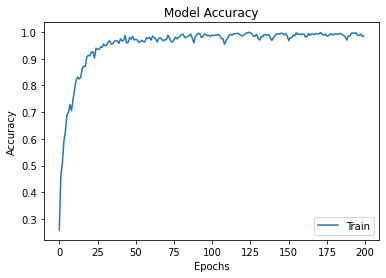

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train'])
plt.show

In [ ]:
model.save("AI_PROJECT.h5")

In [ ]:
model_CNN=load_model('AI_PROJECT.h5')

1/1 [==============================] - 0s 16ms/step
Bánh cuốn, còn gọi là bánh mướt hay bánh ướt (khi không có nhân), là một món ăn làm từ bột gạo hấp tráng mỏng, cuộn tròn, bên trong độn nhân rau hoặc thịt.


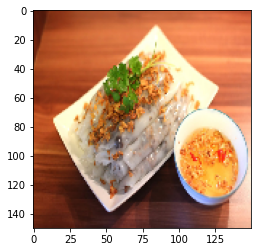

1/1 [==============================] - 0s 16ms/step
Cá kho tộ, món ăn thơm ngon của người miền Nam. Vị cá ngọt mềm, thơm ngậy, chút mằn mặn của nước mắm se se vị cay của ớt


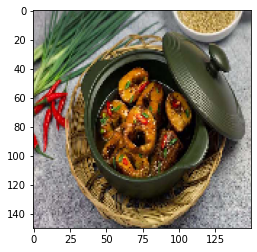

1/1 [==============================] - 0s 16ms/step
Bánh mì Việt Nam (gọi tắt là bánh mì) là một món ăn Việt Nam, với lớp vỏ ngoài là một ổ bánh mì nướng có da giòn, ruột mềm, còn bên trong là phần nhân. Tùy theo văn hóa vùng miền hoặc sở thích cá nhân, người ta có thể chọn nhiều nhân bánh mì khác nhau


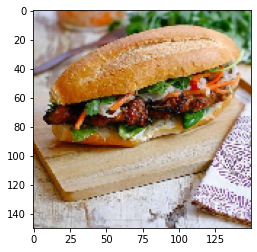

1/1 [==============================] - 0s 17ms/step
Bánh pía là một trong những đặc sản của Sóc Trăng, do người Hoa di cư vào miền Nam sáng tạo ra. Bánh pía được làm từ bột mì nhào mỡ nước từ heo.


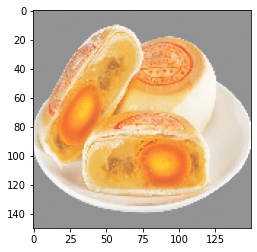

1/1 [==============================] - 0s 18ms/step
Bánh xèo là một loại bánh có bột bên ngoài, bên trong có nhân là tôm, thịt, giá đỗ,... được rán màu vàng, đúc thành hình tròn hoặc gấp lại thành hình bán nguyệt. Tuỳ theo từng địa phương tại Việt Nam mà bánh được thưởng thức với nét đặc trưng riêng. Thường có 2 phương pháp chính: đổ bánh xèo giòn và bánh xèo dai. Ăn bằng hai cách: ăn bốc hoặc ăn bằng đũa.


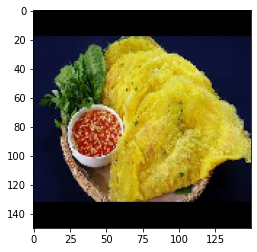

1/1 [==============================] - 0s 16ms/step
Bánh cuốn, còn gọi là bánh mướt hay bánh ướt (khi không có nhân), là một món ăn làm từ bột gạo hấp tráng mỏng, cuộn tròn, bên trong độn nhân rau hoặc thịt.


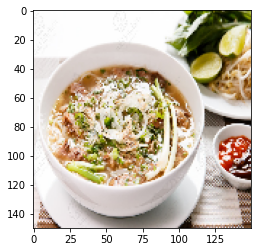

1/1 [==============================] - 0s 18ms/step
Bún đậu mắm tôm là món ăn đơn giản, dân dã trong ẩm thực miền Bắc Việt Nam. Đây là món thường được dùng như bữa ăn nhẹ, ăn chơi. Thành phần chính gồm có bún tươi, đậu hũ chiên vàng, chả cốm, nem chua, dồi chó, mắm tôm pha chanh, ớt và ăn kèm với các loại rau thơm như tía tô, kinh giới, rau húng, xà lách, cà pháo...


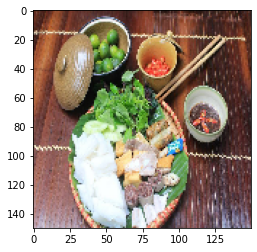

1/1 [==============================] - 0s 16ms/step
Cơm tấm, cơm sườn, hay Cơm tấm Sài Gòn là một món ăn Việt Nam có nguyên liệu chủ yếu từ gạo tấm, sườn nướng, bì, chả, nắm ngọt, mỡ hành,... Một dĩa Cơm tấm thường được phục vụ kèm với một chén nước mắm và một chén canh, trên cùng dĩa ăn sẽ là một miếng sườn nướng và xung quanh là các món ăn mặn kèm khác cùng với mỡ hành được rưới lên trên cùng


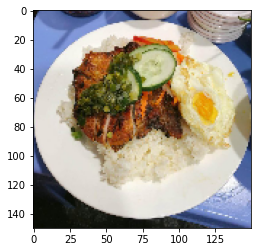

1/1 [==============================] - 0s 26ms/step
Bánh tét, có nơi gọi là bánh đòn, là một loại bánh trong ẩm thực của cả người Việt và một số dân tộc ít người ở miền Nam và miền Trung Việt Nam, là nét tương đồng của bánh chưng ở Miền Bắc về nguyên liệu, cách nấu, chỉ khác về hình dáng và sử dụng lá chuối để gói thay vì lá dong, vì vậy nó cũng được sử dụng nhiều nhất trong dịp Tết Nguyên đán cổ truyền của dân tộc Việt Nam


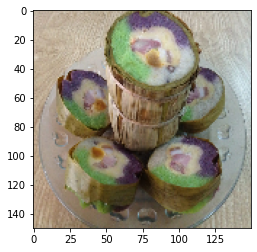

In [ ]:
test="/content/drive/MyDrive/COLAB NOTEBOOK/FOOD/TEST"
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='Bánh cuốn, còn gọi là bánh mướt hay bánh ướt (khi không có nhân), là một món ăn làm từ bột gạo hấp tráng mỏng, cuộn tròn, bên trong độn nhân rau hoặc thịt.'
  if round(result[0][1])==1:
    prediction='Bánh mì Việt Nam (gọi tắt là bánh mì) là một món ăn Việt Nam, với lớp vỏ ngoài là một ổ bánh mì nướng có da giòn, ruột mềm, còn bên trong là phần nhân. Tùy theo văn hóa vùng miền hoặc sở thích cá nhân, người ta có thể chọn nhiều nhân bánh mì khác nhau'
  if round(result[0][2])==1:
    prediction='Bánh pía là một trong những đặc sản của Sóc Trăng, do người Hoa di cư vào miền Nam sáng tạo ra. Bánh pía được làm từ bột mì nhào mỡ nước từ heo.'
  if round(result[0][3])==1:
    prediction='Bánh tét, có nơi gọi là bánh đòn, là một loại bánh trong ẩm thực của cả người Việt và một số dân tộc ít người ở miền Nam và miền Trung Việt Nam, là nét tương đồng của bánh chưng ở Miền Bắc về nguyên liệu, cách nấu, chỉ khác về hình dáng và sử dụng lá chuối để gói thay vì lá dong, vì vậy nó cũng được sử dụng nhiều nhất trong dịp Tết Nguyên đán cổ truyền của dân tộc Việt Nam'
  if round(result[0][4])==1:
    prediction='Bánh xèo là một loại bánh có bột bên ngoài, bên trong có nhân là tôm, thịt, giá đỗ,... được rán màu vàng, đúc thành hình tròn hoặc gấp lại thành hình bán nguyệt. Tuỳ theo từng địa phương tại Việt Nam mà bánh được thưởng thức với nét đặc trưng riêng. Thường có 2 phương pháp chính: đổ bánh xèo giòn và bánh xèo dai. Ăn bằng hai cách: ăn bốc hoặc ăn bằng đũa.'
  if round(result[0][5])==1:
    prediction='Bún đậu mắm tôm là món ăn đơn giản, dân dã trong ẩm thực miền Bắc Việt Nam. Đây là món thường được dùng như bữa ăn nhẹ, ăn chơi. Thành phần chính gồm có bún tươi, đậu hũ chiên vàng, chả cốm, nem chua, dồi chó, mắm tôm pha chanh, ớt và ăn kèm với các loại rau thơm như tía tô, kinh giới, rau húng, xà lách, cà pháo...'
  if round(result[0][6])==1:
    prediction='Cá kho tộ, món ăn thơm ngon của người miền Nam. Vị cá ngọt mềm, thơm ngậy, chút mằn mặn của nước mắm se se vị cay của ớt'
  if round(result[0][7])==1:
    prediction='Cơm tấm, cơm sườn, hay Cơm tấm Sài Gòn là một món ăn Việt Nam có nguyên liệu chủ yếu từ gạo tấm, sườn nướng, bì, chả, nắm ngọt, mỡ hành,... Một dĩa Cơm tấm thường được phục vụ kèm với một chén nước mắm và một chén canh, trên cùng dĩa ăn sẽ là một miếng sườn nướng và xung quanh là các món ăn mặn kèm khác cùng với mỡ hành được rưới lên trên cùng'
  if round(result[0][8])==1:
    prediction='Phở là một món ăn truyền thống của Việt Nam, có nguồn gốc từ Nam Định, Hà Nội và được xem là một trong những món ăn tiêu biểu cho nền ẩm thực Việt Nam.Thành phần chính của phở là bánh phở và nước dùng cùng với thịt bò hoặc thịt gà cắt lát mỏng. Thịt bò thích hợp nhất để nấu phở là thịt, xương từ các giống bò ta (bò nội, bò vàng). Ngoài ra còn kèm theo các gia vị như: tương, tiêu, chanh, nước mắm, ớt,...'
  print(prediction)
  plt.show() 